In [204]:
# Import necessary libraries
import pandas as pd
import numpy as np
import bottleneck as bn
from functools import reduce
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import missingno as msno

# Increase the number of displayed columns and rows
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
np.set_printoptions(suppress=True)

In [205]:
# Load the train data
path = "data/"
train = pd.read_csv(path + "train.csv", parse_dates=["date"])
train

,cat,date,gor,gas,oil,watercut,water,bhp,group,water_inj
0,hw-3,2020-02-01,731.414978,3.660375e+06,5004.512533,0.000043,0.002136,3274.055729,P,NaN
1,hw-3,2020-03-01,731.414978,3.782299e+06,5171.207386,0.000022,0.001117,3237.286417,P,NaN
2,hw-3,2020-04-01,731.414978,3.571577e+06,4883.105894,0.000014,0.000673,3221.117826,P,NaN
3,hw-3,2020-05-01,731.414978,3.653935e+06,4995.706858,0.000044,0.002196,3196.397707,P,NaN
4,hw-3,2020-06-01,731.414978,3.611093e+06,4937.133294,0.000101,0.004971,3187.041537,P,NaN
...,...,...,...,...,...,...,...,...,...,...
82387,inj-1,2047-09-01,NaN,NaN,NaN,NaN,NaN,5995.503506,I,3935.766573
82388,inj-1,2047-10-01,NaN,NaN,NaN,NaN,NaN,5993.501181,I,3738.682762
82389,inj-1,2047-11-01,NaN,NaN,NaN,NaN,NaN,6000.702407,I,3856.022495
82390,inj-1,2047-12-01,NaN,NaN,NaN,NaN,NaN,5998.218088,I,4112.029014


In [206]:
# Pivot the train data to get it in the required format
data = train.pivot_table(index="date", columns="cat", values="oil")
data.head()

cat,hw-10,hw-24,hw-25,hw-26,hw-27,hw-28,hw-29,hw-3,hw-30,hw-31,hw-32,hw-4,hw-5,hw-6,hw-7,hw-8,hw-9,well-1,well-10,well-100,well-101,well-102,well-103,well-104,well-105,well-106,well-107,well-108,well-109,well-11,well-110,well-111,well-112,well-113,well-114,well-115,well-116,well-117,well-118,well-119,well-12,well-120,well-121,well-122,well-123,well-124,well-125,well-126,well-127,well-128,well-129,well-13,well-130,well-131,well-132,well-133,well-134,well-135,well-136,well-137,well-138,well-139,well-14,well-140,well-141,well-142,well-143,well-144,well-145,well-146,well-147,well-148,well-149,well-15,well-150,well-151,well-152,well-153,well-154,well-155,well-156,well-157,well-158,well-159,well-16,well-160,well-161,well-162,well-163,well-164,well-165,well-166,well-167,well-168,well-169,well-17,well-170,well-171,well-172,well-173,well-174,well-175,well-176,well-177,well-178,well-179,well-18,well-180,well-181,well-182,well-183,well-184,well-185,well-186,well-187,well-188,well-189,well-19,well-190,well-191,well-192,well-193,well-194,well-195,well-196,well-197,well-198,well-199,well-2,well-20,well-200,well-201,well-202,well-203,well-204,well-205,well-206,well-207,well-208,well-209,well-21,well-210,well-211,well-212,well-213,well-214,well-215,well-216,well-217,well-218,well-219,well-22,well-220,well-221,well-222,well-223,well-224,well-225,well-226,well-227,well-228,well-229,well-23,well-230,well-231,well-232,well-233,well-234,well-235,well-236,well-237,well-238,well-239,well-24,well-240,well-241,well-242,well-243,well-244,well-245,well-246,well-247,well-248,well-25,well-26,well-27,well-28,well-29,well-3,well-30,well-31,well-32,well-33,well-34,well-35,well-36,well-37,well-38,well-39,well-4,well-40,well-41,well-42,well-43,well-44,well-45,well-46,well-47,well-48,well-49,well-5,well-50,well-51,well-52,well-53,well-54,well-55,well-56,well-57,well-58,well-59,well-6,well-60,well-61,well-62,well-63,well-64,well-65,well-66,well-67,well-68,well-69,well-7,well-70,well-71,well-72,well-73,well-74,well-75,well-76,well-77,well-78,well-79,well-8,well-80,well-81,well-82,well-83,well-84,well-85,well-86,well-87,well-88,well-89,well-9,well-90,well-91,well-92,well-93,well-94,well-95,well-96,well-97,well-98,well-99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-01,2622.960641,3112.100243,2577.727751,79.304023,0.0,2427.483659,4957.311651,5004.512533,5035.078571,0.0,5029.845714,0.0,0.0,5063.537081,0.0,0.0,853.500150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,2395.298452,2782.798494,2595.218306,66.973557,0.0,1814.193666,4847.876930,5171.207386,4832.662574,0.0,4968.389120,0.0,0.0,5013.735467,0.0,0.0,510.423406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<Axes: >

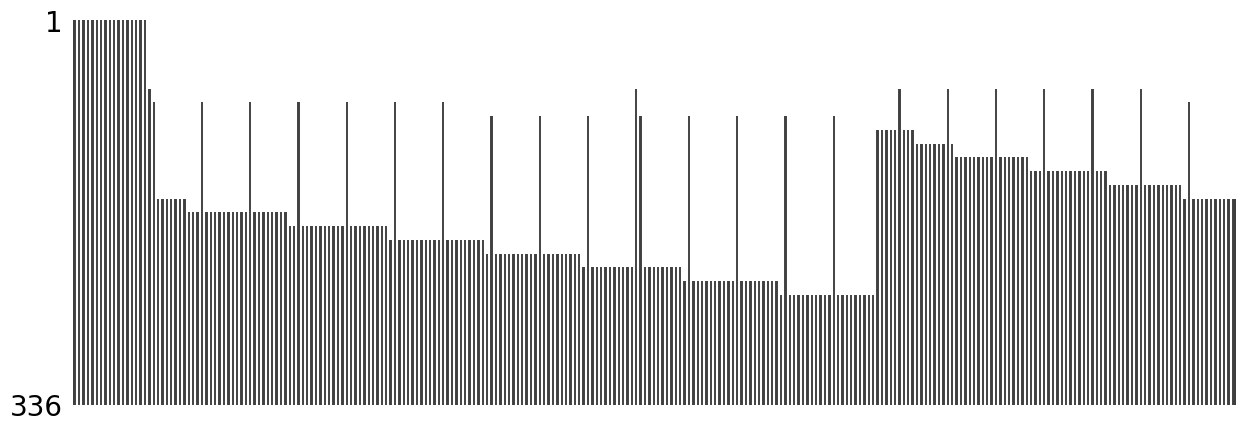

In [207]:
# Visualize the missing data using Missingno
msno.matrix(data, sparkline=False, figsize=(15, 5))

In [208]:
# Get the maximum date in the dataset
max_date_in_dataset = data.index.max()
max_date_in_dataset

Timestamp('2048-01-01 00:00:00')

In [209]:
# Create subsequent date values according to the specified horizon
HORIZON = 24
future_dates = pd.date_range(start=max_date_in_dataset, periods=HORIZON + 1, freq="MS")
future_dates

DatetimeIndex(['2048-01-01', '2048-02-01', '2048-03-01', '2048-04-01',
               '2048-05-01', '2048-06-01', '2048-07-01', '2048-08-01',
               '2048-09-01', '2048-10-01', '2048-11-01', '2048-12-01',
               '2049-01-01', '2049-02-01', '2049-03-01', '2049-04-01',
               '2049-05-01', '2049-06-01', '2049-07-01', '2049-08-01',
               '2049-09-01', '2049-10-01', '2049-11-01', '2049-12-01',
               '2050-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [210]:
# Add the new date values to the data index
new_index = data.index.append(future_dates)
new_index

DatetimeIndex(['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01',
               ...
               '2049-04-01', '2049-05-01', '2049-06-01', '2049-07-01',
               '2049-08-01', '2049-09-01', '2049-10-01', '2049-11-01',
               '2049-12-01', '2050-01-01'],
              dtype='datetime64[ns]', length=361, freq=None)

In [211]:
data = data.reindex(new_index)
data

cat,hw-10,hw-24,hw-25,hw-26,hw-27,hw-28,hw-29,hw-3,hw-30,hw-31,hw-32,hw-4,hw-5,hw-6,hw-7,hw-8,hw-9,well-1,well-10,well-100,well-101,well-102,well-103,well-104,well-105,well-106,well-107,well-108,well-109,well-11,well-110,well-111,well-112,well-113,well-114,well-115,well-116,well-117,well-118,well-119,well-12,well-120,well-121,well-122,well-123,well-124,well-125,well-126,well-127,well-128,well-129,well-13,well-130,well-131,well-132,well-133,well-134,well-135,well-136,well-137,well-138,well-139,well-14,well-140,well-141,well-142,well-143,well-144,well-145,well-146,well-147,well-148,well-149,well-15,well-150,well-151,well-152,well-153,well-154,well-155,well-156,well-157,well-158,well-159,well-16,well-160,well-161,well-162,well-163,well-164,well-165,well-166,well-167,well-168,well-169,well-17,well-170,well-171,well-172,well-173,well-174,well-175,well-176,well-177,well-178,well-179,well-18,well-180,well-181,well-182,well-183,well-184,well-185,well-186,well-187,well-188,well-189,well-19,well-190,well-191,well-192,well-193,well-194,well-195,well-196,well-197,well-198,well-199,well-2,well-20,well-200,well-201,well-202,well-203,well-204,well-205,well-206,well-207,well-208,well-209,well-21,well-210,well-211,well-212,well-213,well-214,well-215,well-216,well-217,well-218,well-219,well-22,well-220,well-221,well-222,well-223,well-224,well-225,well-226,well-227,well-228,well-229,well-23,well-230,well-231,well-232,well-233,well-234,well-235,well-236,well-237,well-238,well-239,well-24,well-240,well-241,well-242,well-243,well-244,well-245,well-246,well-247,well-248,well-25,well-26,well-27,well-28,well-29,well-3,well-30,well-31,well-32,well-33,well-34,well-35,well-36,well-37,well-38,well-39,well-4,well-40,well-41,well-42,well-43,well-44,well-45,well-46,well-47,well-48,well-49,well-5,well-50,well-51,well-52,well-53,well-54,well-55,well-56,well-57,well-58,well-59,well-6,well-60,well-61,well-62,well-63,well-64,well-65,well-66,well-67,well-68,well-69,well-7,well-70,well-71,well-72,well-73,well-74,well-75,well-76,well-77,well-78,well-79,well-8,well-80,well-81,well-82,well-83,well-84,well-85,well-86,well-87,well-88,well-89,well-9,well-90,well-91,well-92,well-93,well-94,well-95,well-96,well-97,well-98,well-99
2020-02-01,2622.960641,3112.100243,2577.727751,79.304023,0.0,2427.483659,4957.311651,5004.512533,5035.078571,0.0,5029.845714,0.0,0.0,5063.537081,0.0,0.0,853.500150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,2395.298452,2782.798494,2595.218306,66.973557,0.0,1814.193666,4847.876930,5171.207386,4832.662574,0.0,4968.389120,0.0,0.0,5013.735467,0.0,0.0,510.423406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [212]:
# Initialize rolling statistics dataframes with original data
rolling_mean_24 = data.copy()
rolling_std_24 = data.copy()
rolling_median_24 = data.copy()
rolling_diff_24 = data.copy()
rolling_exp_weighted_mean = data.copy()

In [213]:
# Function to compute rolling statistics
def bottleneck_stats(
    series, periods=1, min_count=1, window=4, fillna=None, aggfunc="mean"
):
    """
    Function to compute rolling statistics using the bottleneck library
    This function calculates various rolling statistics such as mean, standard deviation, sum, median, difference, and rank.
    The function can be customized to compute any of these statistics with a given window size, minimum count of non-NaN values, and fill NaN values with a specified method.
    This is a very flexible function that can be used to generate a wide range of features from time series data.

    Параметры
    ----------
    series:
        pandas.Series
    periods: int, по умолчанию 1
        Порядок лага, с которым вычисляем скользящие
        статистики.
    min_periods: int, по умолчанию 1
        Минимальное количество наблюдений в окне для
        вычисления скользящих статистик.
    window: int, по умолчанию 4
        Ширина окна. Не должна быть меньше
        горизонта прогнозирования.
    fast: bool, по умолчанию True
        Режим вычислений скользящих статистик.
    fillna, int, по умолчанию 0
        Стратегия импутации пропусков.
    aggfunc, string, по умолчанию 'mean'
        Агрегирующая функция.
    """

    def shift(xs, n):
        return np.concatenate((np.full(n, np.nan), xs[:-n]))

    arr = series.values
    arr = shift(xs=arr, n=periods)
    if aggfunc == "mean":
        arr = bn.move_mean(arr, window=window, min_count=min_count)
    if aggfunc == "std":
        arr = bn.move_std(arr, window=window, min_count=min_count)
    if aggfunc == "sum":
        arr = bn.move_sum(arr, window=window, min_count=min_count)
    if aggfunc == "median":
        arr = bn.move_median(arr, window=window, min_count=min_count)
    if aggfunc == "diff":
        min_arr = bn.move_min(arr, window=window, min_count=min_count)
        max_arr = bn.move_max(arr, window=window, min_count=min_count)
        diff_arr = max_arr - min_arr
        diff_arr = np.insert(diff_arr, 0, diff_arr[-1])
        arr = np.delete(diff_arr, -1)
    if aggfunc == "rank":
        arr = bn.move_rank(arr, window=window, min_count=min_count)

    features = pd.Series(arr)
    features.index = series.index

    # импутируем пропуски
    if fillna is not None:
        features.fillna(fillna, inplace=True)

    return features

In [214]:
# Calculate rolling statistics for each segment in the data
# This loop applies the bottleneck_stats function to each segment in the data to generate rolling statistics.
segments_list = data.columns.tolist()

for i in segments_list:
    rolling_mean_24[i] = bottleneck_stats(rolling_mean_24[i], window=24, min_count=1)
    rolling_std_24[i] = bottleneck_stats(
        rolling_std_24[i], window=24, min_count=1, aggfunc="std"
    )
    rolling_median_24[i] = bottleneck_stats(
        rolling_median_24[i], window=24, min_count=1, aggfunc="median"
    )
    rolling_diff_24[i] = bottleneck_stats(
        rolling_diff_24[i], window=24, min_count=1, aggfunc="diff"
    )
    rolling_exp_weighted_mean[i] = rolling_exp_weighted_mean[i].ewm(alpha=0.15).mean()

In [215]:
# Fill NaN values in rolling statistics dataframes
# The NaN values in the rolling statistics dataframes are filled with zeros.
rolling_mean_24.fillna(0, inplace=True)
rolling_std_24.fillna(0, inplace=True)
rolling_median_24.fillna(0, inplace=True)
rolling_diff_24.fillna(0, inplace=True)
rolling_exp_weighted_mean.fillna(0, inplace=True)

In [216]:
# Assigning the date index to a new column in each of the rolling statistics dataframes
# This is done to prepare the dataframes for melting (converting from wide format to long format) in the next steps.
rolling_mean_24["date"] = rolling_mean_24.index
rolling_mean_24

C:\Users\Artyom\AppData\Local\Temp\ipykernel_58116\493053392.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rolling_mean_24["date"] = rolling_mean_24.index


cat,hw-10,hw-24,hw-25,hw-26,hw-27,hw-28,hw-29,hw-3,hw-30,hw-31,hw-32,hw-4,hw-5,hw-6,hw-7,hw-8,hw-9,well-1,well-10,well-100,well-101,well-102,well-103,well-104,well-105,well-106,well-107,well-108,well-109,well-11,well-110,well-111,well-112,well-113,well-114,well-115,well-116,well-117,well-118,well-119,well-12,well-120,well-121,well-122,well-123,well-124,well-125,well-126,well-127,well-128,well-129,well-13,well-130,well-131,well-132,well-133,well-134,well-135,well-136,well-137,well-138,well-139,well-14,well-140,well-141,well-142,well-143,well-144,well-145,well-146,well-147,well-148,well-149,well-15,well-150,well-151,well-152,well-153,well-154,well-155,well-156,well-157,well-158,well-159,well-16,well-160,well-161,well-162,well-163,well-164,well-165,well-166,well-167,well-168,well-169,well-17,well-170,well-171,well-172,well-173,well-174,well-175,well-176,well-177,well-178,well-179,well-18,well-180,well-181,well-182,well-183,well-184,well-185,well-186,well-187,well-188,well-189,well-19,well-190,well-191,well-192,well-193,well-194,well-195,well-196,well-197,well-198,well-199,well-2,well-20,well-200,well-201,well-202,well-203,well-204,well-205,well-206,well-207,well-208,well-209,well-21,well-210,well-211,well-212,well-213,well-214,well-215,well-216,well-217,well-218,well-219,well-22,well-220,well-221,well-222,well-223,well-224,well-225,well-226,well-227,well-228,well-229,well-23,well-230,well-231,well-232,well-233,well-234,well-235,well-236,well-237,well-238,well-239,well-24,well-240,well-241,well-242,well-243,well-244,well-245,well-246,well-247,well-248,well-25,well-26,well-27,well-28,well-29,well-3,well-30,well-31,well-32,well-33,well-34,well-35,well-36,well-37,well-38,well-39,well-4,well-40,well-41,well-42,well-43,well-44,well-45,well-46,well-47,well-48,well-49,well-5,well-50,well-51,well-52,well-53,well-54,well-55,well-56,well-57,well-58,well-59,well-6,well-60,well-61,well-62,well-63,well-64,well-65,well-66,well-67,well-68,well-69,well-7,well-70,well-71,well-72,well-73,well-74,well-75,well-76,well-77,well-78,well-79,well-8,well-80,well-81,well-82,well-83,well-84,well-85,well-86,well-87,well-88,well-89,well-9,well-90,well-91,well-92,well-93,well-94,well-95,well-96,well-97,well-98,well-99,date
2020-02-01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [217]:
rolling_std_24["date"] = rolling_std_24.index
rolling_median_24["date"] = rolling_median_24.index
rolling_diff_24["date"] = rolling_diff_24.index
rolling_exp_weighted_mean["date"] = rolling_exp_weighted_mean.index

C:\Users\Artyom\AppData\Local\Temp\ipykernel_58116\3993203577.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rolling_std_24["date"] = rolling_std_24.index
C:\Users\Artyom\AppData\Local\Temp\ipykernel_58116\3993203577.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rolling_median_24["date"] = rolling_median_24.index
C:\Users\Artyom\AppData\Local\Temp\ipykernel_58116\3993203577.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

In [218]:
# Melt the rolling statistics dataframes from wide format to long format
# Melting is the process of reshaping data where each row is a unique id-date pair and each statistic has its own column. This is a common format for time series data.
rolling_mean_24 = rolling_mean_24.melt(
    id_vars="date", var_name="cat", value_name="rolling_mean_24"
)
rolling_mean_24

,date,cat,rolling_mean_24
0,2020-02-01,hw-10,0.000000
1,2020-03-01,hw-10,2622.960641
2,2020-04-01,hw-10,2509.129547
3,2020-05-01,hw-10,2455.621897
4,2020-06-01,hw-10,2465.216838
...,...,...,...
95660,2049-09-01,well-99,424.593373
95661,2049-10-01,well-99,423.970820
95662,2049-11-01,well-99,423.687027
95663,2049-12-01,well-99,422.677747


In [219]:
rolling_std_24 = rolling_std_24.melt(
    id_vars="date", var_name="cat", value_name="rolling_std_24"
)
rolling_median_24 = rolling_median_24.melt(
    id_vars="date", var_name="cat", value_name="rolling_median_24"
)
rolling_diff_24 = rolling_diff_24.melt(
    id_vars="date", var_name="cat", value_name="rolling_diff_24"
)
rolling_exp_weighted_mean = rolling_exp_weighted_mean.melt(
    id_vars="date", var_name="cat", value_name="rolling_exp_weighted_mean"
)

In [220]:
# Load the test data
# The test data is loaded from a csv file into a pandas dataframe.
test = pd.read_csv(path + "test.csv", parse_dates=["date"])
test

,cat,date,gor,gas,oil,watercut,water,bhp,group,water_inj
0,hw-3,2048-02-01,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN
1,hw-3,2048-03-01,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN
2,hw-3,2048-04-01,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN
3,hw-3,2048-05-01,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN
4,hw-3,2048-06-01,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN
...,...,...,...,...,...,...,...,...,...,...
10723,inj-1,2049-09-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3857.710393
10724,inj-1,2049-10-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3978.273737
10725,inj-1,2049-11-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3887.219777
10726,inj-1,2049-12-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3879.914298


In [221]:
# Concatenate the train and test data into a single dataframe
# The train and test data are concatenated along the row axis (axis=0). This means that the test data is appended at the end of the train data.
data = pd.concat([train, test], axis=0)
data.reset_index(drop=True, inplace=True)
data

,cat,date,gor,gas,oil,watercut,water,bhp,group,water_inj
0,hw-3,2020-02-01,731.414978,3.660375e+06,5004.512533,0.000043,0.002136,3274.055729,P,NaN
1,hw-3,2020-03-01,731.414978,3.782299e+06,5171.207386,0.000022,0.001117,3237.286417,P,NaN
2,hw-3,2020-04-01,731.414978,3.571577e+06,4883.105894,0.000014,0.000673,3221.117826,P,NaN
3,hw-3,2020-05-01,731.414978,3.653935e+06,4995.706858,0.000044,0.002196,3196.397707,P,NaN
4,hw-3,2020-06-01,731.414978,3.611093e+06,4937.133294,0.000101,0.004971,3187.041537,P,NaN
...,...,...,...,...,...,...,...,...,...,...
93115,inj-1,2049-09-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3857.710393
93116,inj-1,2049-10-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3978.273737
93117,inj-1,2049-11-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3887.219777
93118,inj-1,2049-12-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3879.914298


In [222]:
# Merge all dataframes into a single dataframe
# The dataframes containing the original data and the rolling statistics are merged into a single dataframe. The merging is done on the 'cat' and 'date' columns, which are common to all dataframes.
data_frames = [
    data,
    rolling_mean_24,
    rolling_std_24,
    rolling_median_24,
    rolling_diff_24,
    rolling_exp_weighted_mean,
]
data = reduce(
    lambda left, right: pd.merge(left, right, how="left", on=["cat", "date"]),
    data_frames,
)
data

,cat,date,gor,gas,oil,watercut,water,bhp,group,water_inj,rolling_mean_24,rolling_std_24,rolling_median_24,rolling_diff_24,rolling_exp_weighted_mean
0,hw-3,2020-02-01,731.414978,3.660375e+06,5004.512533,0.000043,0.002136,3274.055729,P,NaN,0.000000,0.000000,0.000000,0.000000,5004.512533
1,hw-3,2020-03-01,731.414978,3.782299e+06,5171.207386,0.000022,0.001117,3237.286417,P,NaN,5004.512533,0.000000,5004.512533,0.000000,5094.617859
2,hw-3,2020-04-01,731.414978,3.571577e+06,4883.105894,0.000014,0.000673,3221.117826,P,NaN,5087.859959,83.347427,5087.859959,0.000000,5012.397464
3,hw-3,2020-05-01,731.414978,3.653935e+06,4995.706858,0.000044,0.002196,3196.397707,P,NaN,5019.608604,118.100342,5004.512533,166.694854,5007.159758
4,hw-3,2020-06-01,731.414978,3.611093e+06,4937.133294,0.000101,0.004971,3187.041537,P,NaN,5013.633168,102.800222,5000.109695,288.101493,4988.277734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101330,inj-1,2049-09-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3857.710393,NaN,NaN,NaN,NaN,NaN
101331,inj-1,2049-10-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3978.273737,NaN,NaN,NaN,NaN,NaN
101332,inj-1,2049-11-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3887.219777,NaN,NaN,NaN,NaN,NaN
101333,inj-1,2049-12-01,NaN,NaN,NaN,NaN,NaN,NaN,I,3879.914298,NaN,NaN,NaN,NaN,NaN


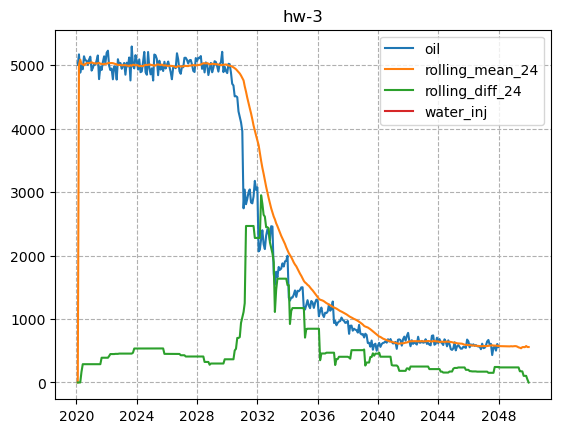

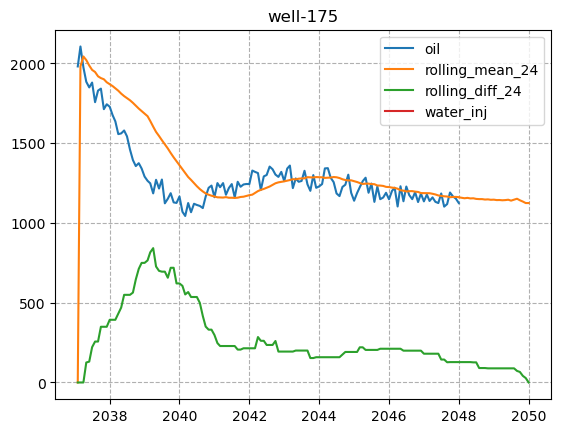

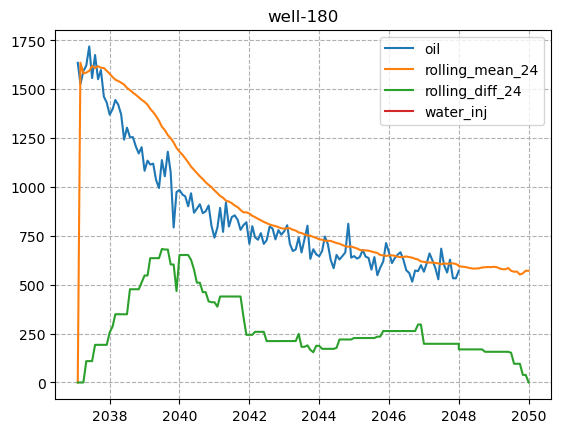

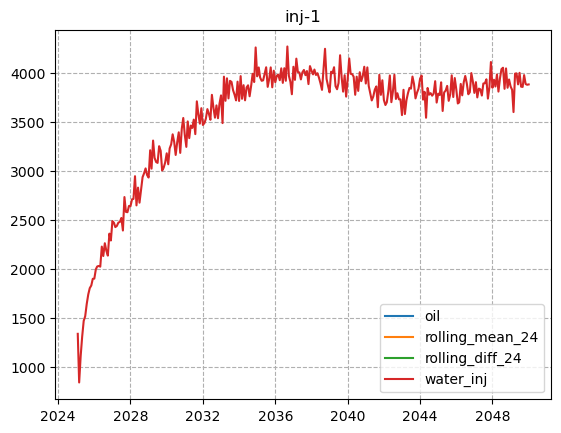

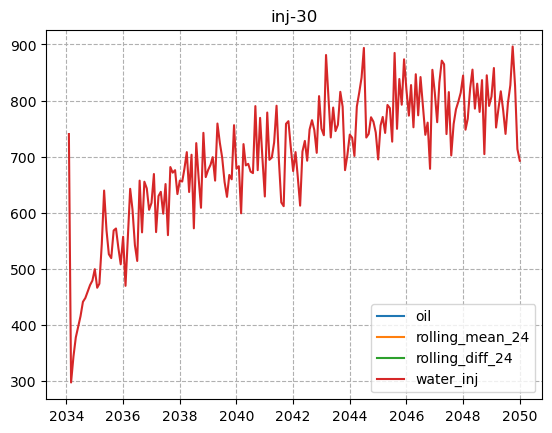

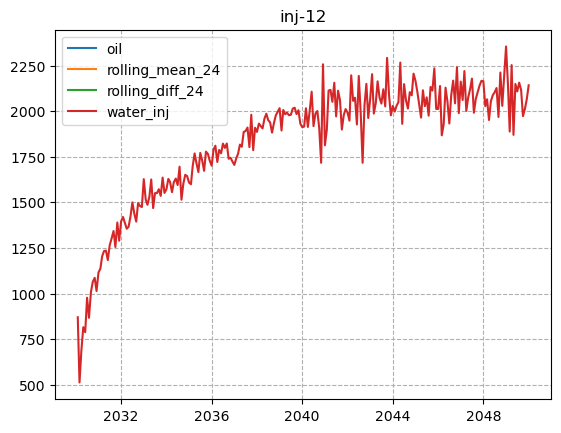

In [223]:
# Plot the original and rolling statistics time series for some segments
# This loop generates time series plots for some selected segments. Each plot includes the original series and the calculated rolling statistics.
cats = ["hw-3", "well-175", "well-180", "inj-1", "inj-30", "inj-12"]

for cat in cats:
    plt.title(cat)

    df = data[data["cat"] == cat].copy()

    label = "oil"
    plt.plot(df["date"], df[label], label=label)
    label = "rolling_mean_24"
    plt.plot(df["date"], df[label], label=label)
    label = "rolling_diff_24"
    plt.plot(df["date"], df[label], label=label)
    label = "water_inj"
    plt.plot(df["date"], df[label], label=label)
    plt.legend()
    plt.grid(ls="--")
    plt.show()

In [224]:
path = 'data/'
coords_df = pd.read_csv(path + "coords.csv")
coords_df.head(3)

,cat,x,y
0,hw-1,69895.0,61474.0
1,hw-2,97263.0,113263.0
2,hw-3,52211.0,84211.0


In [225]:
injection_df = data.merge(coords_df, on='cat', how='left')
injection_df = injection_df[injection_df['group'] == 'I'][['cat', 'date', 'x', 'y', 'water_inj']]
injection_df

,cat,date,x,y,water_inj
55843,inj-p9,2025-02-01,63624.997796,79624.997501,2022.833033
55844,inj-p9,2025-03-01,63624.997796,79624.997501,1727.291280
55845,inj-p9,2025-04-01,63624.997796,79624.997501,1708.073294
55846,inj-p9,2025-05-01,63624.997796,79624.997501,1577.253929
55847,inj-p9,2025-06-01,63624.997796,79624.997501,1457.743953
...,...,...,...,...,...
101330,inj-1,2049-09-01,49374.998177,75374.998596,3857.710393
101331,inj-1,2049-10-01,49374.998177,75374.998596,3978.273737
101332,inj-1,2049-11-01,49374.998177,75374.998596,3887.219777
101333,inj-1,2049-12-01,49374.998177,75374.998596,3879.914298


In [226]:
production_df = data.merge(coords_df, on='cat', how='left')
production_df = production_df[production_df['group'] == 'P'][['cat', 'date', 'x', 'y']]
production_df

,cat,date,x,y
0,hw-3,2020-02-01,52211.000000,84211.000000
1,hw-3,2020-03-01,52211.000000,84211.000000
2,hw-3,2020-04-01,52211.000000,84211.000000
3,hw-3,2020-05-01,52211.000000,84211.000000
4,hw-3,2020-06-01,52211.000000,84211.000000
...,...,...,...,...
96962,well-99,2049-09-01,54374.999129,89124.997644
96963,well-99,2049-10-01,54374.999129,89124.997644
96964,well-99,2049-11-01,54374.999129,89124.997644
96965,well-99,2049-12-01,54374.999129,89124.997644


In [227]:
injection_df.cat.unique().shape, injection_df.date.unique().shape

((182,), (300,))

In [228]:
production_df.cat.unique().shape, production_df.date.unique().shape

((265,), (360,))

In [229]:
prod_inj_df = production_df.merge(injection_df, on='date', how='left', suffixes=('_p', '_i'))
prod_inj_df = prod_inj_df[['date', 'cat_p', 'cat_i', 'x_p', 'y_p', 'x_i', 'y_i', 'water_inj']]
prod_inj_df

,date,cat_p,cat_i,x_p,y_p,x_i,y_i,water_inj
0,2020-02-01,hw-3,NaN,52211.000000,84211.000000,NaN,NaN,NaN
1,2020-03-01,hw-3,NaN,52211.000000,84211.000000,NaN,NaN,NaN
2,2020-04-01,hw-3,NaN,52211.000000,84211.000000,NaN,NaN,NaN
3,2020-05-01,hw-3,NaN,52211.000000,84211.000000,NaN,NaN,NaN
4,2020-06-01,hw-3,NaN,52211.000000,84211.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9945561,2050-01-01,well-99,inj-13,54374.999129,89124.997644,39374.998653,72874.997524,1007.959351
9945562,2050-01-01,well-99,inj-12,54374.999129,89124.997644,49374.998177,85374.998120,2141.506951
9945563,2050-01-01,well-99,inj-11,54374.999129,89124.997644,49374.998177,82874.997644,3364.395015
9945564,2050-01-01,well-99,inj-10,54374.999129,89124.997644,59374.997701,85374.998120,1198.915507


In [230]:
prod_inj_df['distance'] = np.sqrt((prod_inj_df['x_p'] - prod_inj_df['x_i'])**2 + (prod_inj_df['y_p'] - prod_inj_df['y_i'])**2)
prod_inj_df['inj_influence'] = prod_inj_df['water_inj'] / prod_inj_df['distance']
prod_inj_df['inj_influence2'] = prod_inj_df['water_inj'] / prod_inj_df['distance'].pow(2)
prod_inj_df = prod_inj_df.groupby(['date', 'cat_p'])[['inj_influence', 'inj_influence2']].sum().reset_index()
prod_inj_df.head(3)

,date,cat_p,inj_influence,inj_influence2
0,2020-02-01,hw-10,0.0,0.0
1,2020-02-01,hw-24,0.0,0.0
2,2020-02-01,hw-25,0.0,0.0


In [231]:
data = data.merge(prod_inj_df, left_on=['date', 'cat'], right_on=['date', 'cat_p'], how='left')
data.drop(columns=['cat_p'], inplace=True)

In [232]:
data_path = 'data/data.pkl'
data.to_pickle(data_path)
df = pd.read_pickle(data_path)

In [233]:
# Split the data into train and test sets based on the date
# The data is split into train and test sets such that all data before February 2048 is used for training and all data from February 2048 is used for testing.
train = data[data["date"] < "2048-02-01"]
test = data[data["date"] >= "2048-02-01"]

In [234]:
# Further split the train data into training and validation sets
# The train data is further split into training and validation sets. The training set includes all data before February 2046 and the validation set includes all data from February 2046.
tr = train[train["date"] < "2046-02-01"]
val = train[(train["date"] >= "2046-02-01")]

In [235]:
tr.head()

,cat,date,gor,gas,oil,watercut,water,bhp,group,water_inj,rolling_mean_24,rolling_std_24,rolling_median_24,rolling_diff_24,rolling_exp_weighted_mean,inj_influence,inj_influence2
0,hw-3,2020-02-01,731.414978,3.660375e+06,5004.512533,0.000043,0.002136,3274.055729,P,NaN,0.000000,0.000000,0.000000,0.000000,5004.512533,0.0,0.0
1,hw-3,2020-03-01,731.414978,3.782299e+06,5171.207386,0.000022,0.001117,3237.286417,P,NaN,5004.512533,0.000000,5004.512533,0.000000,5094.617859,0.0,0.0
2,hw-3,2020-04-01,731.414978,3.571577e+06,4883.105894,0.000014,0.000673,3221.117826,P,NaN,5087.859959,83.347427,5087.859959,0.000000,5012.397464,0.0,0.0
3,hw-3,2020-05-01,731.414978,3.653935e+06,4995.706858,0.000044,0.002196,3196.397707,P,NaN,5019.608604,118.100342,5004.512533,166.694854,5007.159758,0.0,0.0
4,hw-3,2020-06-01,731.414978,3.611093e+06,4937.133294,0.000101,0.004971,3187.041537,P,NaN,5013.633168,102.800222,5000.109695,288.101493,4988.277734,0.0,0.0


In [236]:
# Drop irrelevant columns from training and validation sets
# Some columns that are not useful for modeling are dropped from the training and validation sets.
tr = tr[tr["group"] != "I"]
val = val[val["group"] != "I"]

tr_ = tr.copy()
val_ = val.copy()

cols_to_drop = [
    "cat",
    "date",
    "group",
    "water_inj",
    "gor",
    "gas",
    "watercut",
    "water",
    "bhp",
    "inj_influence2",
]
tr = tr.drop(cols_to_drop, axis=1)
val = val.drop(cols_to_drop, axis=1)

y_tr = tr.pop("oil")
y_val = val.pop("oil")

In [237]:
tr

,rolling_mean_24,rolling_std_24,rolling_median_24,rolling_diff_24,rolling_exp_weighted_mean,inj_influence
0,0.000000,0.000000,0.000000,0.000000,5004.512533,0.000000
1,5004.512533,0.000000,5004.512533,0.000000,5094.617859,0.000000
2,5087.859959,83.347427,5087.859959,0.000000,5012.397464,0.000000
3,5019.608604,118.100342,5004.512533,166.694854,5007.159758,0.000000
4,5013.633168,102.800222,5000.109695,288.101493,4988.277734,0.000000
...,...,...,...,...,...,...
55783,565.377488,58.094201,576.305416,291.822492,525.415170,25.353001
55784,555.011084,63.143581,568.003424,249.468762,521.693243,25.406312
55785,550.580581,63.075307,565.136300,271.979448,517.007382,25.323964
55786,542.755756,58.213009,564.376325,271.979448,513.697348,25.295485


In [238]:
# Get variable with names of numerical columns
num_cols = tr.select_dtypes(exclude="object").columns
num_cols

Index(['rolling_mean_24', 'rolling_std_24', 'rolling_median_24',
       'rolling_diff_24', 'rolling_exp_weighted_mean', 'inj_influence'],
      dtype='object')

In [156]:
# Normalize numerical columns in training and validation sets
# The numerical columns in the training and validation sets are normalized using the MinMaxScaler. This scales each feature to range between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(train[num_cols])
tr[num_cols] = scaler.transform(tr[num_cols])
val[num_cols] = scaler.transform(val[num_cols])

In [27]:
# # Fit a Ridge regression model and make predictions
# # A Ridge regression model is fit on the training data and used to make predictions on the training and validation data. The mean absolute error (MAE) of the predictions is calculated and printed.
# model = Ridge()
# model.fit(tr, y_tr)
# tr_fcst = model.predict(tr)
# val_fcst = model.predict(val)

# mae_tr = mean_absolute_error(y_tr, tr_fcst)
# mae_val = mean_absolute_error(y_val, val_fcst)

# print("MAE train:", f"{mae_tr:.2f}")
# print("MAE validation:", f"{mae_val:.2f}")

In [28]:
# from sklearn.tree import DecisionTreeRegressor

# # Fit a Decision Tree regression model and make predictions
# # A Decision Tree regression model is fit on the training data and used to make predictions on the training and validation data. The mean absolute error (MAE) of the predictions is calculated and printed.
# model = DecisionTreeRegressor()
# model.fit(tr, y_tr)
# tr_fcst = model.predict(tr)
# val_fcst = model.predict(val)

# mae_tr = mean_absolute_error(y_tr, tr_fcst)
# mae_val = mean_absolute_error(y_val, val_fcst)

# print("MAE train:", f"{mae_tr:.2f}")
# print("MAE validation:", f"{mae_val:.2f}")

In [29]:
# from sklearn.ensemble import RandomForestRegressor

# # Fit a Random Forest regression model and make predictions
# # A Random Forest regression model is fit on the training data and used to make predictions on the training and validation data. The mean absolute error (MAE) of the predictions is calculated and printed.
# model = RandomForestRegressor()
# model.fit(tr, y_tr)
# tr_fcst = model.predict(tr)
# val_fcst = model.predict(val)

# mae_tr = mean_absolute_error(y_tr, tr_fcst)
# mae_val = mean_absolute_error(y_val, val_fcst)

# print("MAE train:", f"{mae_tr:.2f}")
# print("MAE validation:", f"{mae_val:.2f}")

In [30]:
# from catboost import CatBoostRegressor

# # Fit a CatBoost regression model and make predictions
# # A CatBoost regression model is fit on the training data and used to make predictions on the training and validation data. The mean absolute error (MAE) of the predictions is calculated and printed.
# model = CatBoostRegressor(verbose=0)
# model.fit(tr, y_tr)
# tr_fcst = model.predict(tr)
# val_fcst = model.predict(val)

# mae_tr = mean_absolute_error(y_tr, tr_fcst)
# mae_val = mean_absolute_error(y_val, val_fcst)

# print("MAE train:", f"{mae_tr:.2f}")
# print("MAE validation:", f"{mae_val:.2f}")

In [239]:
from lightgbm import LGBMRegressor

# Fit a LightGBM regression model and make predictions
# A LightGBM regression model is fit on the training data and used to make predictions on the training and validation data. The mean absolute error (MAE) of the predictions is calculated and printed.
model = LGBMRegressor()
model.fit(tr, y_tr)
tr_fcst = model.predict(tr)
val_fcst = model.predict(val)

mae_tr = mean_absolute_error(y_tr, tr_fcst)
mae_val = mean_absolute_error(y_val, val_fcst)

print("MAE train:", f"{mae_tr:.2f}")
print("MAE validation:", f"{mae_val:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 41268, number of used features: 6
[LightGBM] [Info] Start training from score 1560.021685
MAE train: 49.12
MAE validation: 56.24


In [240]:
import lightgbm

model.booster_.save_model('model.txt')
#load from model:
model = lightgbm.Booster(model_file='model.txt')

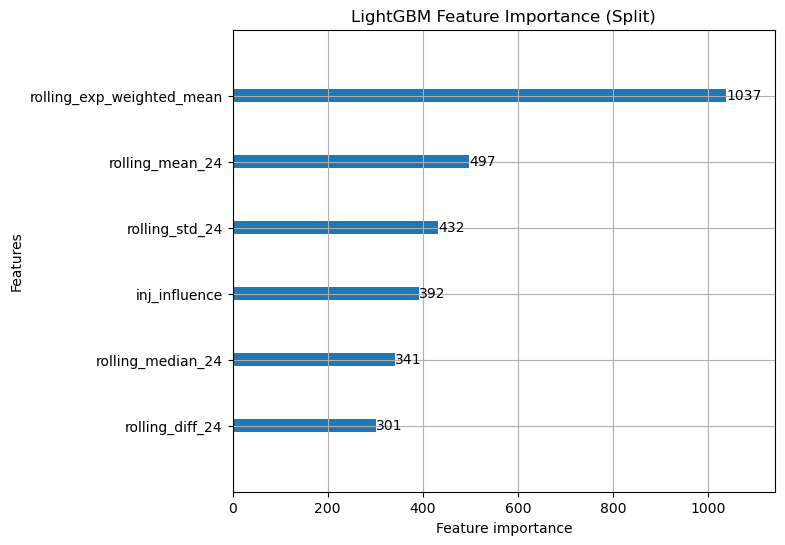

In [241]:
from lightgbm import plot_importance
plot_importance(model, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()

In [32]:
# from xgboost import XGBRegressor

# # Fit an XGBoost regression model and make predictions
# # An XGBoost regression model is fit on the training data and used to make predictions on the training and validation data. The mean absolute error (MAE) of the predictions is calculated and printed.
# model = XGBRegressor()
# model.fit(tr, y_tr)
# tr_fcst = model.predict(tr)
# val_fcst = model.predict(val)

# mae_tr = mean_absolute_error(y_tr, tr_fcst)
# mae_val = mean_absolute_error(y_val, val_fcst)

# print("MAE train:", f"{mae_tr:.2f}")
# print("MAE validation:", f"{mae_val:.2f}")

MAE train: 40.03
MAE validation: 42.31


In [159]:
# Assign the predictions to new columns in the original training and validation dataframes
# The predictions made by the Ridge regression model are assigned to new columns named 'fcst' in the original training and validation dataframes.
tr_["fcst"] = tr_fcst
val_["fcst"] = val_fcst

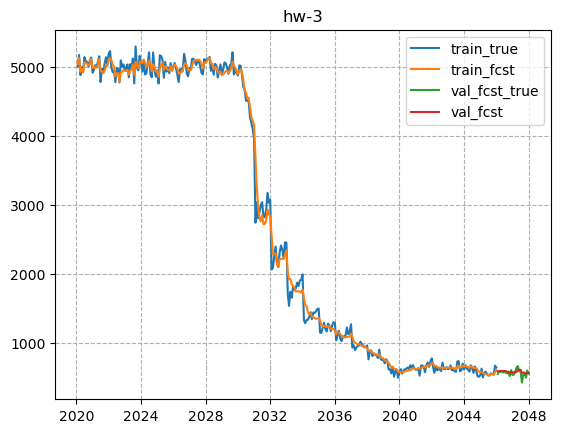

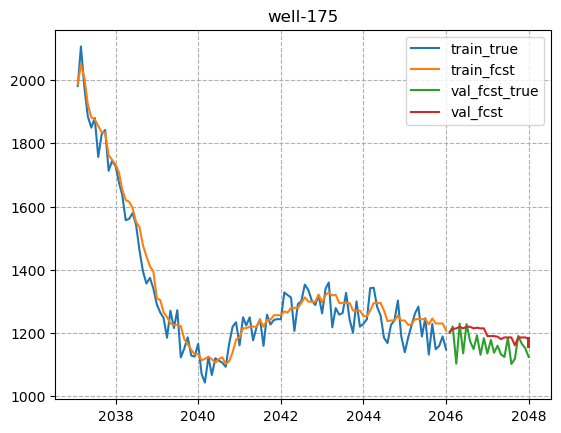

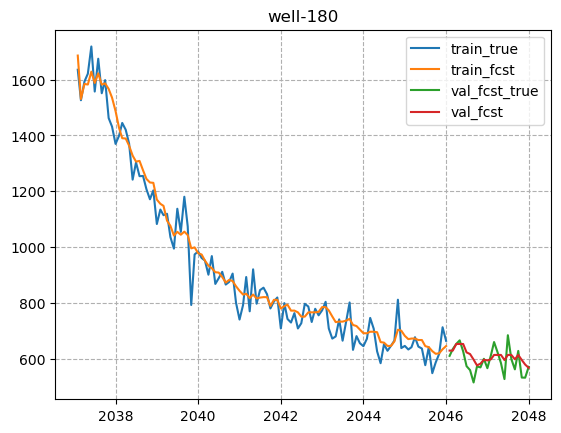

In [160]:
# Visualize the true and predicted values for some segments
# This loop generates time series plots for some selected segments. Each plot includes the true and predicted values for the training and validation data.
cats = ["hw-3", "well-175", "well-180"]

for cat in cats:
    plt.title(cat)

    df = tr_[tr_["cat"] == cat].copy()

    label = "oil"
    plt.plot(df["date"], df[label], label="train_true")
    label = "fcst"
    plt.plot(df["date"], df[label], label="train_fcst")

    df = val_[val_["cat"] == cat].copy()

    label = "oil"
    plt.plot(df["date"], df[label], label="val_fcst_true")
    label = "fcst"
    plt.plot(df["date"], df[label], label="val_fcst")

    plt.legend()
    plt.grid(ls="--")
    plt.show()

In [33]:
# Preprocess the train and test data for final model training
# The 'group' column is dropped from the train and test data. This is because the 'group' column is not useful for the final model training.
train = train[train["group"] != "I"]
test = test[test["group"] != "I"]

In [34]:
# Extract the 'cat' and 'date' columns from the test data and store in a new dataframe
# The 'cat' and 'date' columns are needed for the final submission file.
test_ = test[["cat", "date"]].copy()

In [37]:
# Pop the target variable from the train data
# The 'oil' column is the target variable and is popped from the train data.
y_train = train.pop("oil")

In [38]:
# Drop irrelevant columns from train and test data
# Some columns that are not useful for modeling are dropped from the train and test data.
train = train.drop(cols_to_drop, axis=1)
test = test.drop(np.append(cols_to_drop, ["oil"]), axis=1)

In [39]:
# Normalize numerical columns in train and test data
# The numerical columns in the train and test data are normalized using the MinMaxScaler. This scales each feature to range between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(train[num_cols])
train[num_cols] = scaler.transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [40]:
# Fit the Ridge model on the train data and make predictions on the test data
model.fit(train, y_train)
fcst = model.predict(test)

In [41]:
# Assign the predictions to a new column in the test data
# The predictions made by the Ridge regression model are assigned to a new column named 'fcst' in the test data.
test_["fcst"] = fcst

# Save the test data with predictions to a csv file
# The test data along with the predictions is saved to a csv file for submission.
test_.to_csv(path + "fcst.csv", index=False)

Сделать прогноз с MAE<97.5